# Descripción del Dataset: Fraud Detection Dataset

Este conjunto de datos contiene información sobre transacciones financieras, incluyendo atributos del usuario, del contexto y del evento de transacción. Su propósito principal es el análisis y detección de fraudes.

### Columnas del dataset

| Atributo                               | Descripción                                                                 |
|---------------------------------------|------------------------------------------------------------------------------|
| `Transaction_ID`                      | Identificador único de la transacción                                       |
| `User_ID`                             | Identificador del usuario que realizó la transacción                        |
| `Transaction_Amount`                  | Monto de la transacción                                                     |
| `Transaction_Type`                    | Tipo de transacción (e.g. ATM Withdrawal, POS Payment, etc.)                |
| `Time_of_Transaction`                 | Hora del día en que se realizó la transacción                               |
| `Device_Used`                         | Tipo de dispositivo usado (Mobile, Desktop, Tablet)                         |
| `Location`                            | Ciudad donde ocurrió la transacción                                         |
| `Previous_Fraudulent_Transactions`    | Número de fraudes previos registrados por el usuario                        |
| `Account_Age`                         | Antigüedad de la cuenta en días                                             |
| `Number_of_Transactions_Last_24H`     | Cantidad de transacciones del usuario en las últimas 24 horas               |
| `Payment_Method`                      | Método de pago usado (Credit Card, UPI, etc.)                               |
| `Fraudulent`                          | Etiqueta de fraude (1 = fraudulenta, 0 = legítima)                          |

# 1. Configuración inicial

In [ ]:
!pip install kaggle

In [ ]:
#API key persistente

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API_creds/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
import pandas as pd

#Cargar el dataset

path = kagglehub.dataset_download("ranjitmandal/fraud-detection-dataset-csv")
df = pd.read_csv(path + '/Fraud Detection Dataset.csv')

100%|██████████| 854k/854k [00:00<00:00, 1.75MB/s]

Extracting files...


# 2. Primera aproximación

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('rows, columns: ' + str(df.shape) + '\n')
df.head()

rows, columns: (51000, 12)



,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [ ]:
df.groupby('Fraudulent').count()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
Fraudulent,,,,,,,,,,,
0,48490,48490,46095,48490,46072,46169,46066,48490,48490,48490,46126
1,2510,2510,2385,2510,2376,2358,2387,2510,2510,2510,2405


### Examinemos las variables:

#### Tipos de datos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [ ]:
# Conversión de variables
df["Transaction_ID"] = df["Transaction_ID"].astype(str)
df["User_ID"] = df["User_ID"].astype(str)

categorical_cols = ["Transaction_Type", "Device_Used", "Location", "Payment_Method"]
df[categorical_cols] = df[categorical_cols].astype("category")

df["Time_of_Transaction"] = pd.to_numeric(df["Time_of_Transaction"], errors="coerce")

df["Fraudulent"] = df["Fraudulent"].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Transaction_ID                    51000 non-null  object  
 1   User_ID                           51000 non-null  object  
 2   Transaction_Amount                48480 non-null  float64 
 3   Transaction_Type                  51000 non-null  category
 4   Time_of_Transaction               48448 non-null  float64 
 5   Device_Used                       48527 non-null  category
 6   Location                          48453 non-null  category
 7   Previous_Fraudulent_Transactions  51000 non-null  int64   
 8   Account_Age                       51000 non-null  int64   
 9   Number_of_Transactions_Last_24H   51000 non-null  int64   
 10  Payment_Method                    48531 non-null  category
 11  Fraudulent                        51000 non-null  bool

| Columna                                  | Tipo          | Tipo   |
|------------------------------------------|---------------|----------------------|
| `Transaction_ID`                         | Categórica  |   Nominal   (Identificador)       |
| `User_ID`                                | Categórica  |   Nominal   (Identificador)       |
| `Transaction_Amount`                     | Numérica      | Continua             |
| `Transaction_Type`                       |  Categórica  |   Nominal |
| `Time_of_Transaction`                    | Numérica      | Continua    |
| `Device_Used`                            | Categórica  |   Nominal |
| `Location`                               | Categórica  |   Nominal |
| `Previous_Fraudulent_Transactions`       | Numérica      | Discreta             |
| `Account_Age`                            | Numérica      | Discreta             |
| `Number_of_Transactions_Last_24H`        | Numérica      | Discreta             |
| `Payment_Method`                         | Categórica  |   Nominal |
| `Fraudulent`                             |  Categórica    |     Binaria     |

In [ ]:
summary = df.describe()
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
summary.apply(lambda s: s.apply('{:.2f}'.format))

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H
count,48480.00,48448.00,51000.00,51000.00,51000.00
mean,2996.25,11.49,2.00,60.03,7.50
std,5043.93,6.92,1.42,34.38,4.02
min,5.03,0.00,0.00,1.00,1.00
25%,1270.55,5.00,1.00,30.00,4.00
50%,2524.10,12.00,2.00,60.00,7.00
75%,3787.24,17.00,3.00,90.00,11.00
max,49997.80,23.00,4.00,119.00,14.00
range,49992.77,23.00,4.00,118.00,13.00


In [ ]:
cols_cat = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
cols_num = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H']

for col in cols_cat:
  print(f'{col}: {df[col].nunique()} Valores diferentes \n')

df[cols_num].describe()

In [ ]:
for col in cols_cat:
    unique_values = df[col].unique()
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_values)


Valores únicos en la columna 'Transaction_Type':
['ATM Withdrawal', 'Bill Payment', 'POS Payment', 'Bank Transfer', 'Online Purchase']
Categories (5, object): ['ATM Withdrawal', 'Bank Transfer', 'Bill Payment', 'Online Purchase',
                         'POS Payment']

Valores únicos en la columna 'Device_Used':
['Tablet', 'Mobile', 'Desktop', NaN, 'Unknown Device']
Categories (4, object): ['Desktop', 'Mobile', 'Tablet', 'Unknown Device']

Valores únicos en la columna 'Location':
['San Francisco', 'New York', NaN, 'Chicago', 'Boston', 'Houston', 'Miami', 'Los Angeles', 'Seattle']
Categories (8, object): ['Boston', 'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York',
                         'San Francisco', 'Seattle']

Valores únicos en la columna 'Payment_Method':
['Debit Card', 'Credit Card', NaN, 'UPI', 'Net Banking', 'Invalid Method']
Categories (5, object): ['Credit Card', 'Debit Card', 'Invalid Method', 'Net Banking', 'UPI']


# 3. Limpieza de datos

## 3.1 Datos faltantes

In [ ]:
#Eliminamos las filas que tengan datos faltantes

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39583 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Transaction_ID                    39583 non-null  object  
 1   User_ID                           39583 non-null  object  
 2   Transaction_Amount                39583 non-null  float64 
 3   Transaction_Type                  39583 non-null  category
 4   Time_of_Transaction               39583 non-null  float64 
 5   Device_Used                       39583 non-null  category
 6   Location                          39583 non-null  category
 7   Previous_Fraudulent_Transactions  39583 non-null  int64   
 8   Account_Age                       39583 non-null  int64   
 9   Number_of_Transactions_Last_24H   39583 non-null  int64   
 10  Payment_Method                    39583 non-null  category
 11  Fraudulent                        39583 non-null  bool    


## 3.2 Columnas irrelevantes

- `Transaction_ID`: Es solo un identificador único, no tiene valor predictivo directo.

- `User_ID`: Similar a lo anterior: puede ser irrelevante para el modelo tal cual está, pero podría usarse para crear estadísticas agregadas (por ejemplo: fraude por usuario).

- `Location`: Si no se normaliza o codifica correctamente, puede introducir ruido (muchas ciudades, ortografía inconsistente, etc.). Podría agruparse por región o país si aplica.
Vamos a optar por dejar esta columna hasta realizar el analisis exploratorio

In [ ]:
cols_cat = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']

for col in cols_cat:
  print(f'{col}: {df[col].nunique()} Valores diferentes \n')

Transaction_Type: 5 Valores diferentes 

Device_Used: 4 Valores diferentes 

Location: 8 Valores diferentes 

Payment_Method: 5 Valores diferentes 



In [ ]:
#Variables numéricas, se omite la interpretación de los resultados de los identificadores (Transacion_ID, User_ID)
df.describe()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H
count,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000
mean,2995.273051,11.459617,1.995528,59.944471,7.495541
std,5050.702270,6.912935,1.414340,34.321202,4.017372
min,5.030000,0.000000,0.000000,1.000000,1.000000
25%,1267.435000,5.000000,1.000000,30.000000,4.000000
50%,2521.670000,11.000000,2.000000,60.000000,7.000000
75%,3781.080000,17.000000,3.000000,90.000000,11.000000
max,49997.800000,23.000000,4.000000,119.000000,14.000000


## 3.3 Filas duplicadas

In [ ]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

Cantidad de filas duplicadas: 688


## 3.4 Outliers en variables numéricas

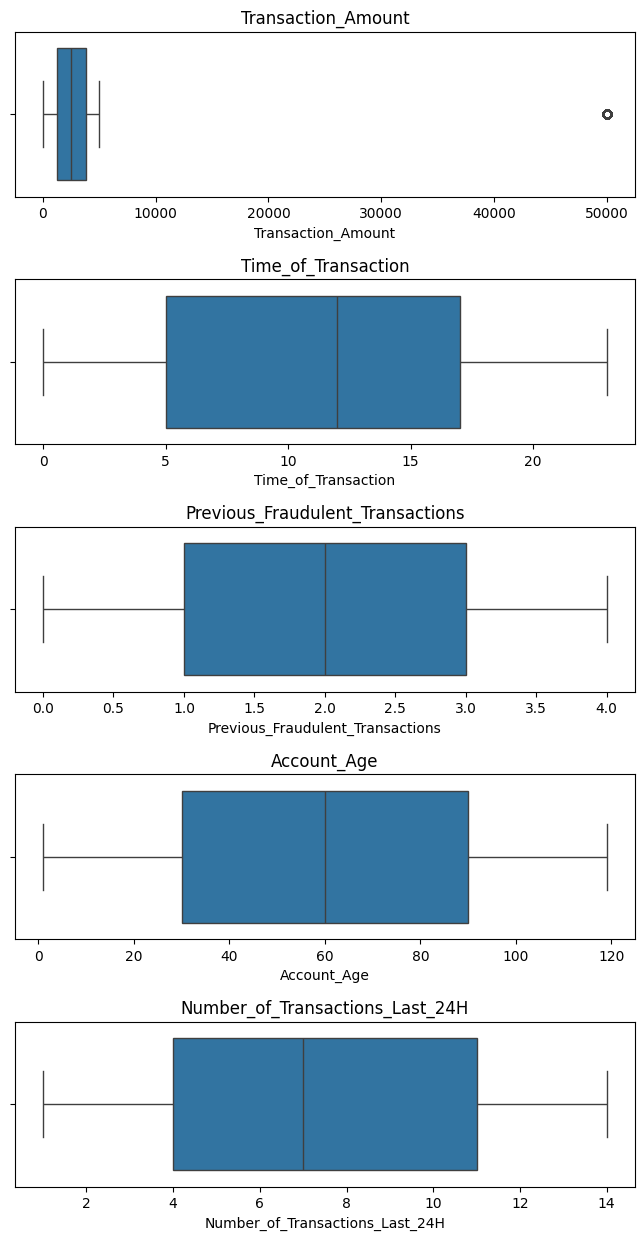

In [ ]:
cols_num = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H']

fig, axs = plt.subplots(5, 1, figsize=(8, 15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=df, ax=axs[i] )
  axs[i].set_title(col)
plt.show()

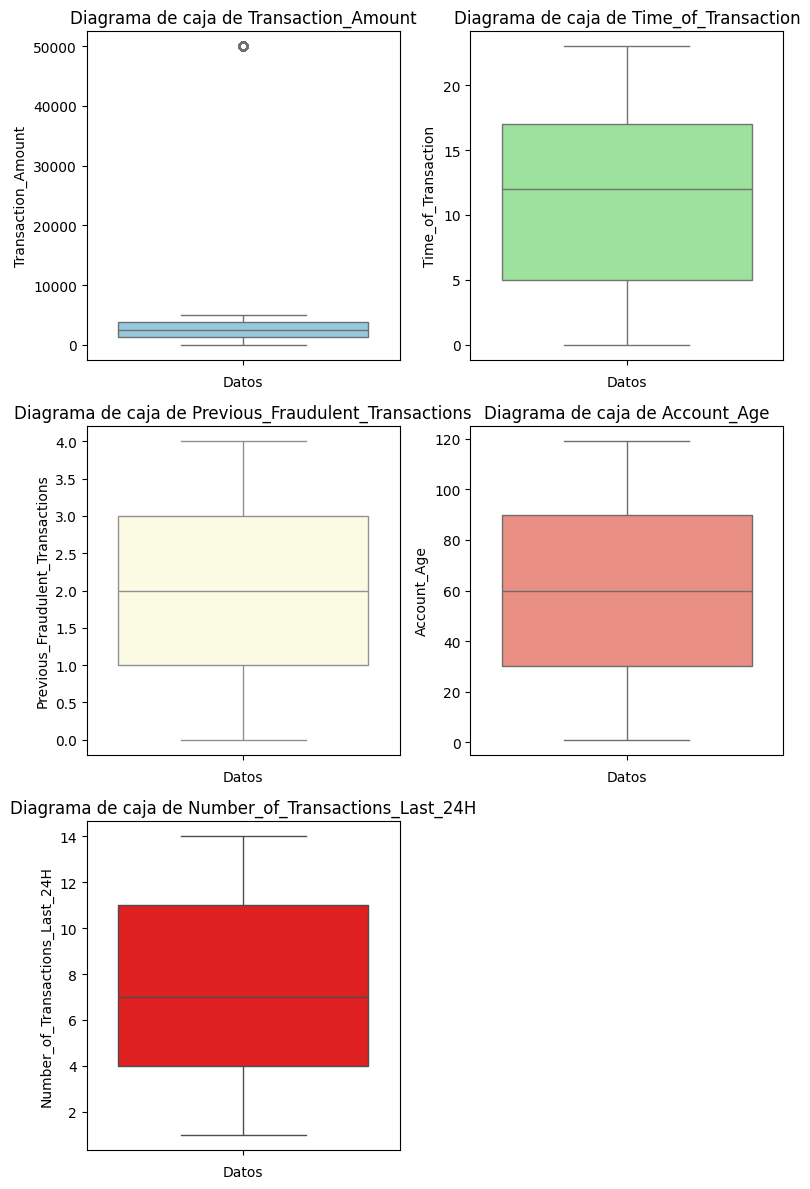

In [ ]:
features = cols_num
colors = ['skyblue', 'lightgreen', 'lightyellow', 'salmon', 'red']

plt.figure(figsize=(8, 12))
for i, (feature, color) in enumerate(zip(features, colors), 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, y=feature, color=color)
    plt.title(f'Diagrama de caja de {feature}')
    plt.xlabel('Datos')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## 3.5 Errores tipográficos en variables categóricas

['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']


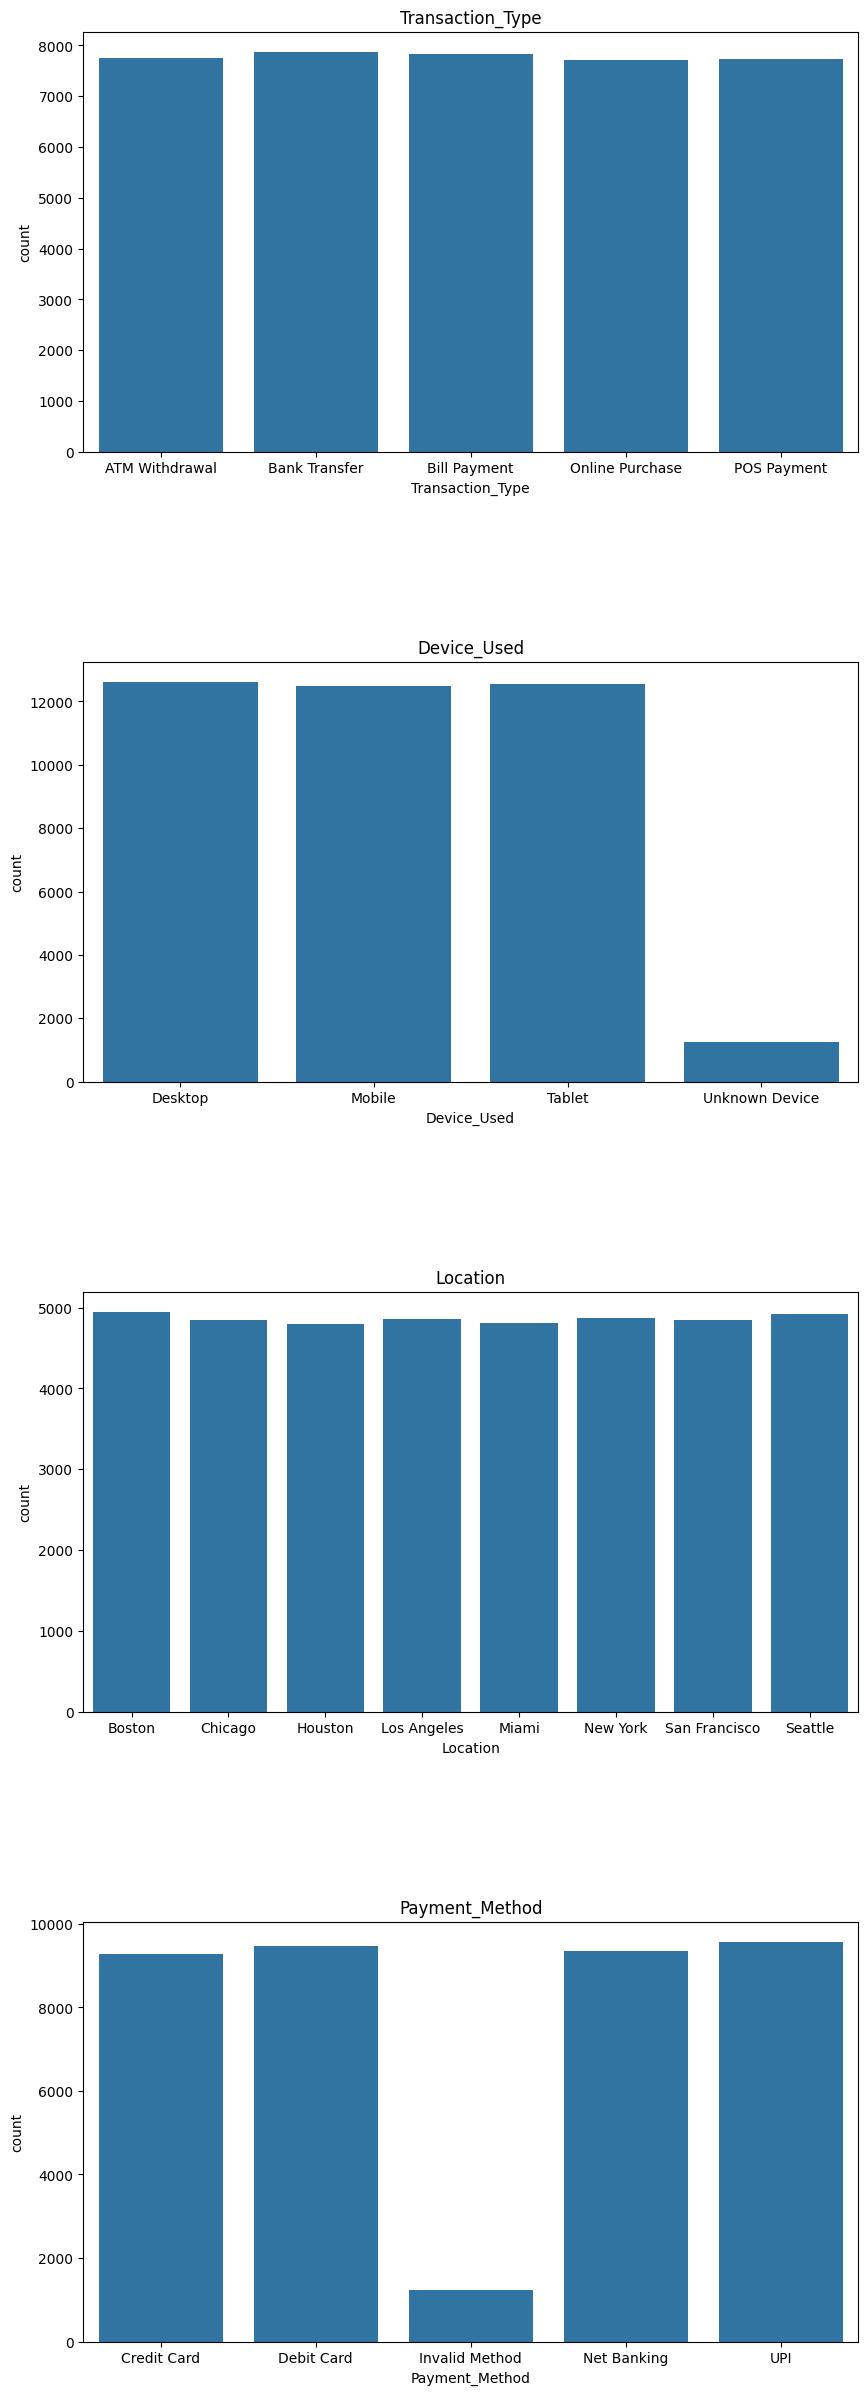

In [ ]:
print(cols_cat)

fig, axs = plt.subplots(4, 1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=axs[i])
  axs[i].set_title(col)

plt.show()

#4.Análisis exploratorio

##4.1. Correlación

<Axes: >

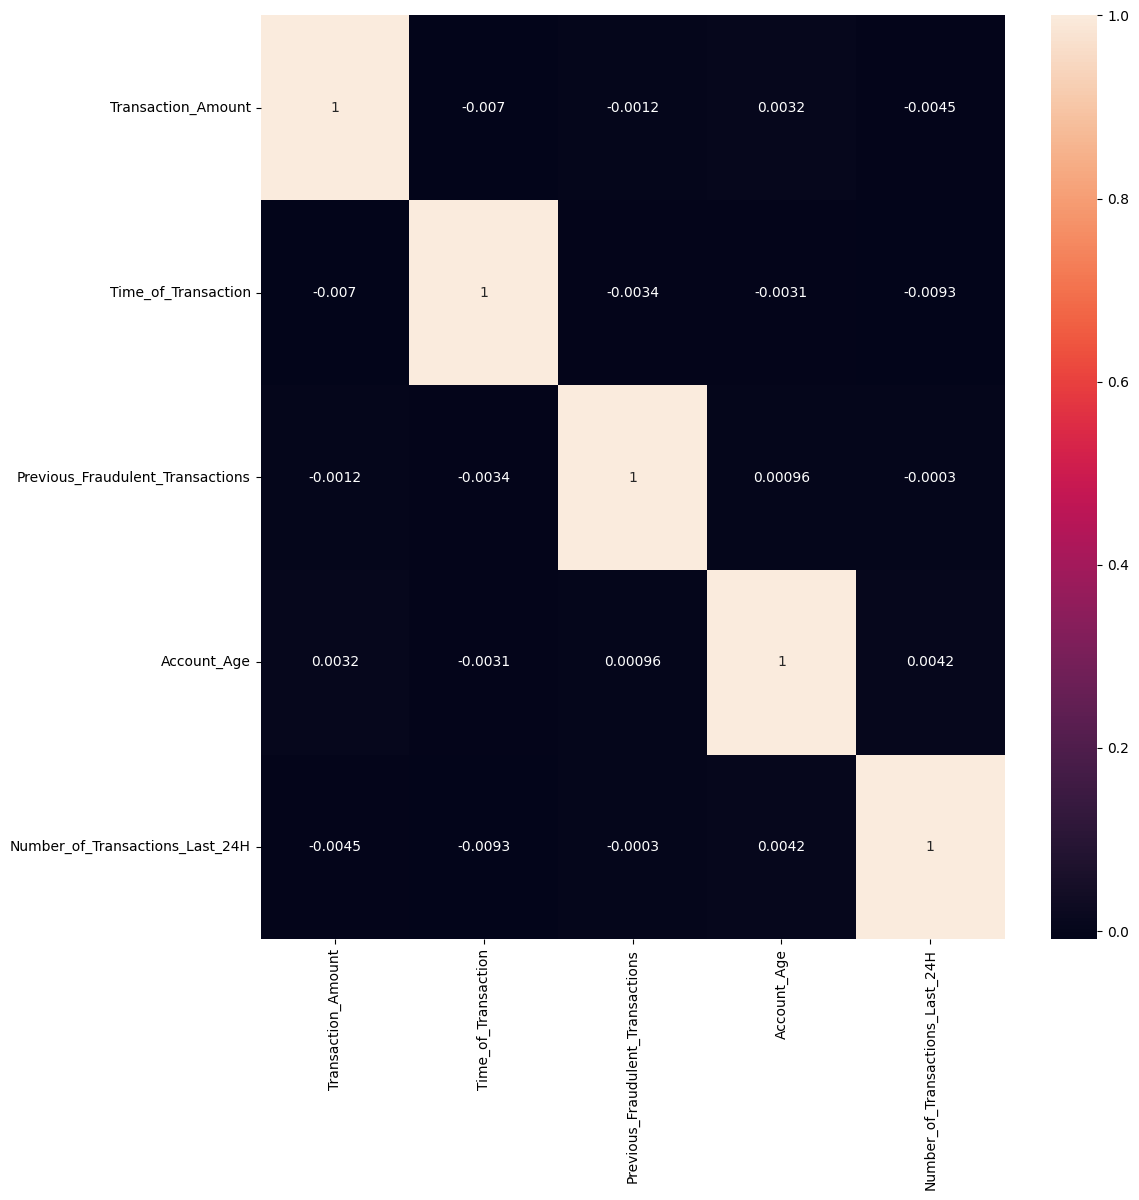

In [ ]:
#Correlación entre las variables numéricas
plt.figure(figsize=(12,12))
sns.heatmap(df[cols_num].corr(), annot=True)

##4.2. Dispersión


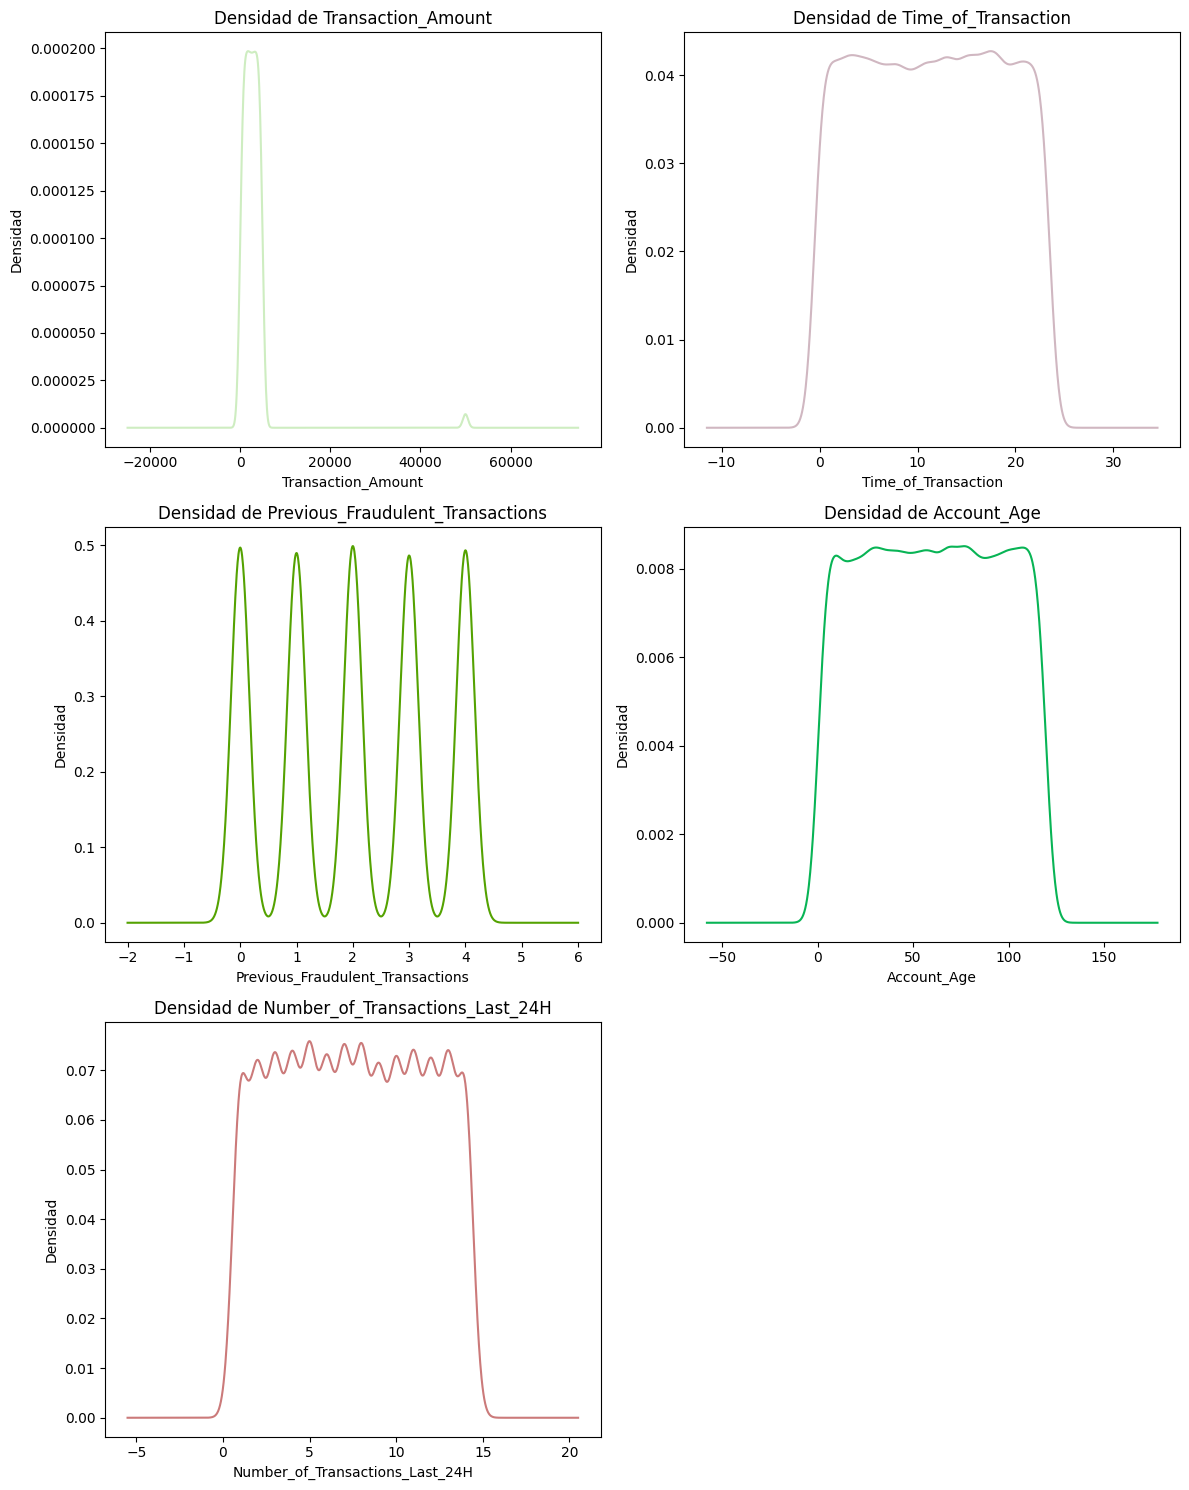

In [ ]:
import random

num_features = len(features)
# Calcular el número de filas y columnas para los subplots
num_rows = (num_features + 1) // 2  # Asegura suficientes filas
num_cols = min(num_features, 2)     # Máximo 2 columnas

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
# Aplanar la matriz de ejes para facilitar la iteración
axs = axs.flatten()
for i, feature in enumerate(features):
    random_color = (random.random(), random.random(), random.random())
    df[feature].plot.kde(ax=axs[i], color=random_color)
    axs[i].set_title(f'Densidad de {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Densidad')

# Ocultar los subplots vacíos si num_features es impar
if num_features % 2 != 0 and num_cols == 2:
    axs[num_features].axis('off')

plt.tight_layout()
plt.show()

##4.3. Relaciones entre variables

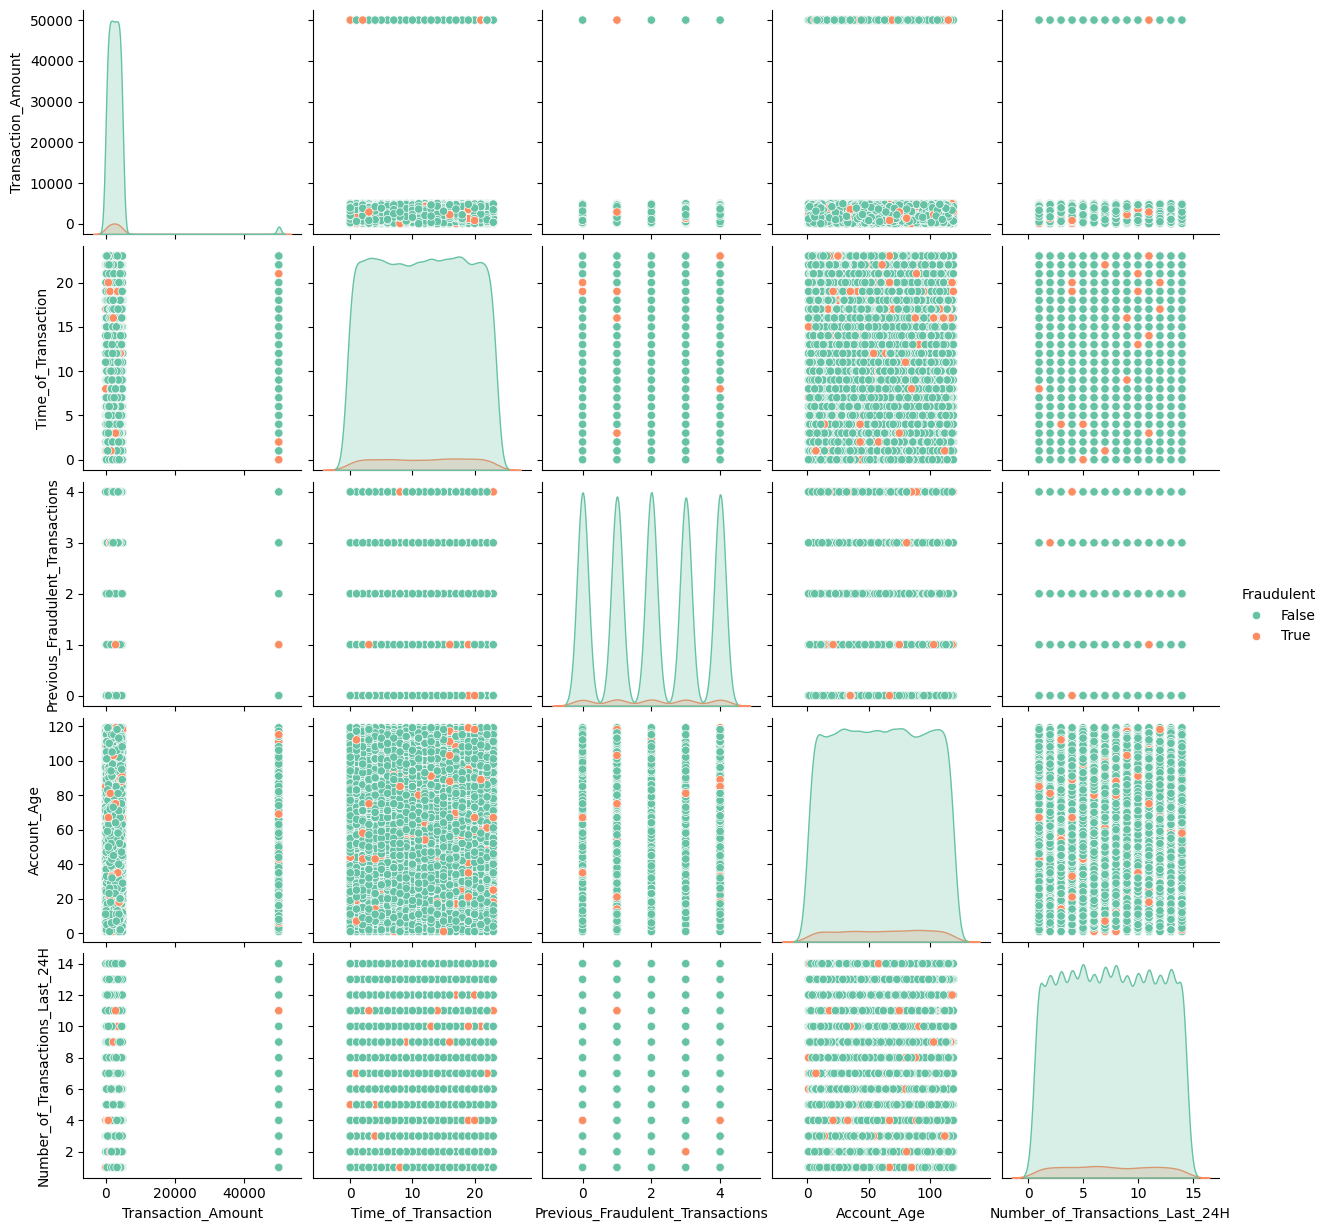

In [ ]:
#En este diagrama podemos ver las funciones de distribución de los casos y la correlación entre variables
import seaborn as sns
g = sns.pairplot(df, hue="Fraudulent", palette="Set2")